In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing All Files
data=pd.read_csv('C:\\Users\\Ahnaf\\Desktop\\LHL Final Project\\LHL-Final-Project-Global-Airport-Analysis-\\data.csv')
world_data=pd.read_csv('C:\\Users\\Ahnaf\\Desktop\\LHL Final Project\\LHL-Final-Project-Global-Airport-Analysis-\\world-data-2023.csv')
airport_data=pd.read_csv('C:\\Users\\Ahnaf\\Desktop\\LHL Final Project\\LHL-Final-Project-Global-Airport-Analysis-\\airports_data.csv')

In [ ]:
# Airport Infrastructure vs. Economic and Population Size

In [7]:
# Grouping the airport data by country to get the total number of airports for each country
airport_counts = airport_data.groupby('country').size().reset_index(name='number_of_airports')

# Merging the datasets
merged_data = pd.merge(world_data, airport_counts, left_on='Country', right_on='country', how='inner')
merged_data = merged_data.drop(columns='country')  # Drop duplicate country column

# Convert GDP to a numeric type for analysis
merged_data['GDP'] = merged_data['GDP'].str.replace(',', '').str.replace('$', '').astype(float)

merged_data.head()


C:\Users\Ahnaf\AppData\Local\Temp\ipykernel_19500\226620934.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_data['GDP'] = merged_data['GDP'].str.replace(',', '').str.replace('$', '').astype(float)


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,number_of_airports
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953,10
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331,2
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626,23
3,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887,10
4,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672,45


In [8]:
# Convert 'Land Area(Km2)' to numeric type for analysis
merged_data['Land Area(Km2)'] = merged_data['Land Area(Km2)'].str.replace(',', '').astype(float)

# Convert 'Population' to numeric type for analysis
merged_data['Population'] = merged_data['Population'].str.replace(',', '').astype(float)

# Calculate airport density and airports per capita
merged_data['airport_density'] = merged_data['number_of_airports'] / merged_data['Land Area(Km2)']
merged_data['airports_per_capita'] = merged_data['number_of_airports'] / merged_data['Population']

merged_data[['Country', 'airport_density', 'airports_per_capita']].head()


,Country,airport_density,airports_per_capita
0,Afghanistan,0.000015,2.628691e-07
1,Albania,0.000070,7.007240e-07
2,Algeria,0.000010,5.342246e-07
3,Angola,0.000008,3.142155e-07
4,Argentina,0.000016,1.001364e-06


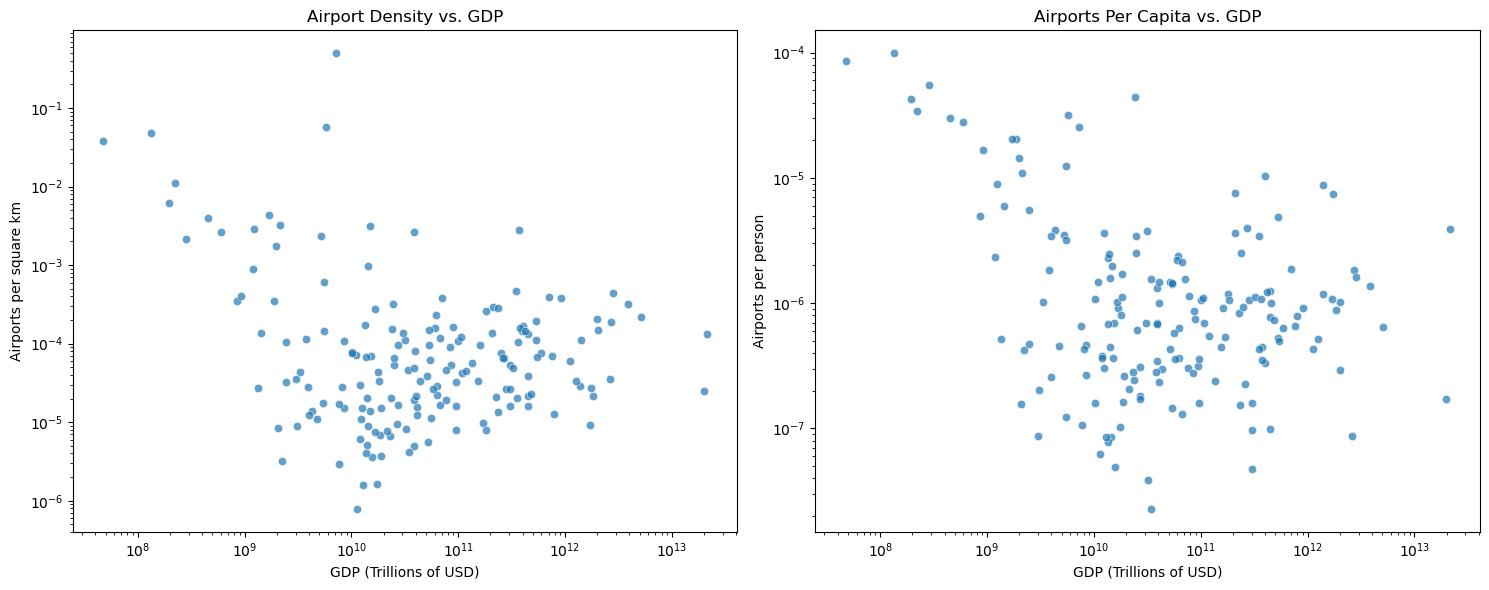

In [9]:
# Setting up the visualization layout
plt.figure(figsize=(15, 6))

# Plotting Airport Density vs. GDP
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_data, x='GDP', y='airport_density', alpha=0.7)
plt.title('Airport Density vs. GDP')
plt.xlabel('GDP (Trillions of USD)')
plt.ylabel('Airports per square km')
plt.xscale('log')
plt.yscale('log')

# Plotting Airports Per Capita vs. GDP
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_data, x='GDP', y='airports_per_capita', alpha=0.7)
plt.title('Airports Per Capita vs. GDP')
plt.xlabel('GDP (Trillions of USD)')
plt.ylabel('Airports per person')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()
